In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [4]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [7]:
df = df.dropna(subset=['County'])

In [8]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 338
DOL Vehicle ID                                         0
Vehicle Location                                       4
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [9]:
df = df.drop('VIN (1-10)', axis=1)

In [10]:
Total_Vehicle = df['DOL Vehicle ID'].nunique()

In [11]:
print(Total_Vehicle)

150479


In [12]:
Average_Range = df['Electric Range'].mean().round(2)

In [13]:
print(Average_Range)

67.88


In [14]:
bev = round(df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['DOL Vehicle ID'].nunique(), 2)

In [15]:
print(bev)

116804


In [16]:
bev_perc = bev/Total_Vehicle

In [17]:
print(bev_perc)

0.7762146213092856


In [18]:
bev_perc_str = f"{bev_perc * 100:.1f}%"

In [19]:
print(bev_perc_str)

77.6%


In [20]:
phev = round(df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['DOL Vehicle ID'].nunique(), 2)

In [21]:
phev_perc = phev/Total_Vehicle

In [22]:
print(phev_perc)

0.22378537869071433


In [23]:
phev_perc_str = f"{phev_perc * 100:.1f}%"

In [24]:
print(phev_perc_str)

22.4%


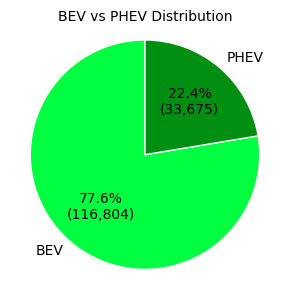

In [25]:
df_summary = pd.DataFrame({
    'Vehicle Type': ['BEV', 'PHEV'],
    'Count': [bev, phev]
})

labels = df_summary['Vehicle Type']
counts = df_summary['Count']
colors = ['#00FF41', '#008f11']  

def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute:,})"

plt.figure(figsize=(3, 3))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, counts),
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("BEV vs PHEV Distribution", fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()


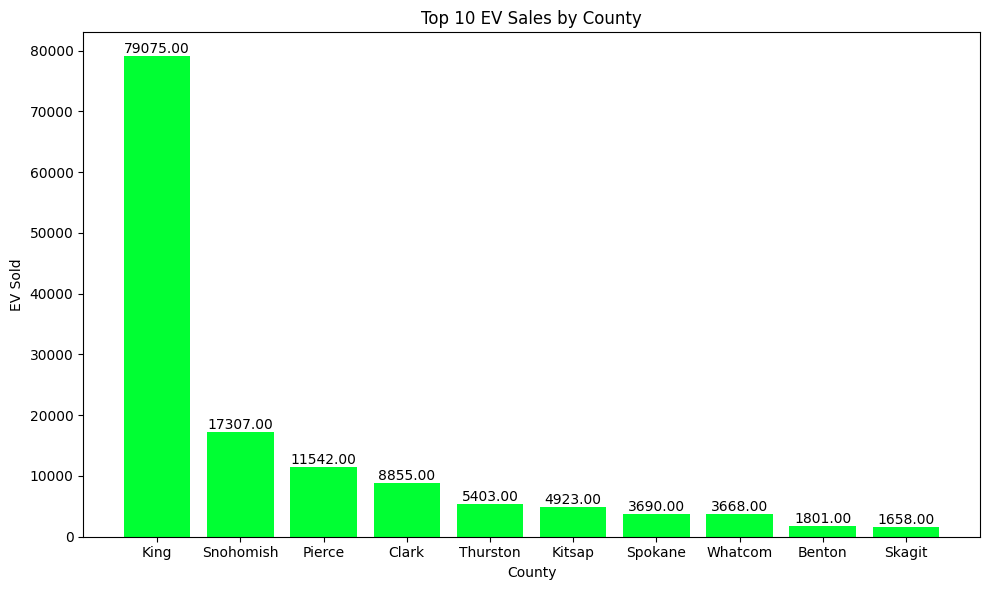

In [26]:
grouped = df.groupby('County')['DOL Vehicle ID'].nunique().reset_index();
top10=grouped.sort_values(by='DOL Vehicle ID', ascending = False).head(10) 
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['County'], top10['DOL Vehicle ID'], color='#00FF33')

plt.title('Top 10 EV Sales by County')
plt.xlabel('County')
plt.ylabel('EV Sold')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

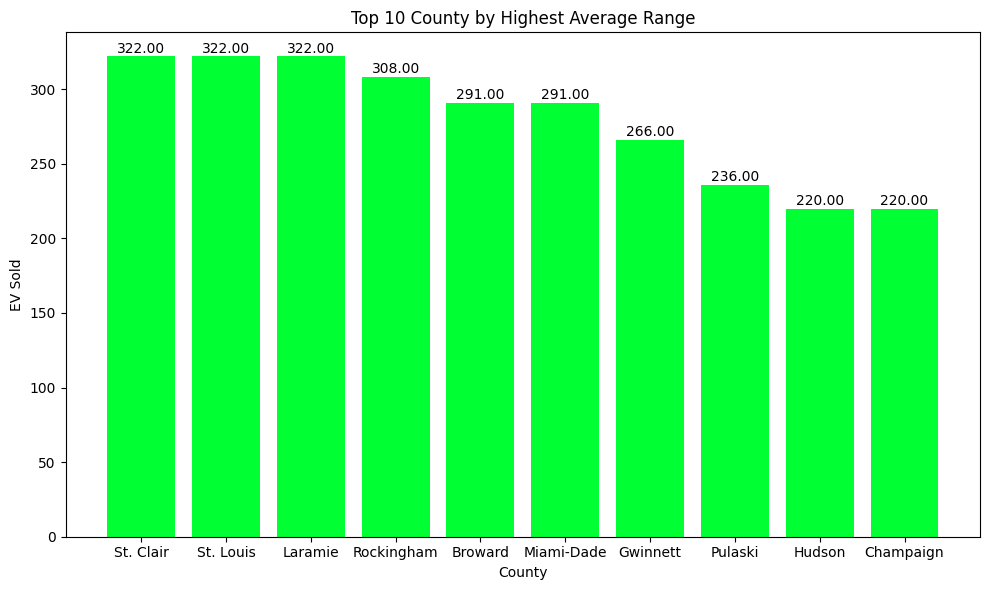

In [27]:
grouped = df.groupby('County')['Electric Range'].mean().reset_index();
top10=grouped.sort_values(by='Electric Range', ascending = False).head(10) 
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['County'], top10['Electric Range'], color='#00FF33')

plt.title('Top 10 County by Highest Average Range')
plt.xlabel('County')
plt.ylabel('EV Sold')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

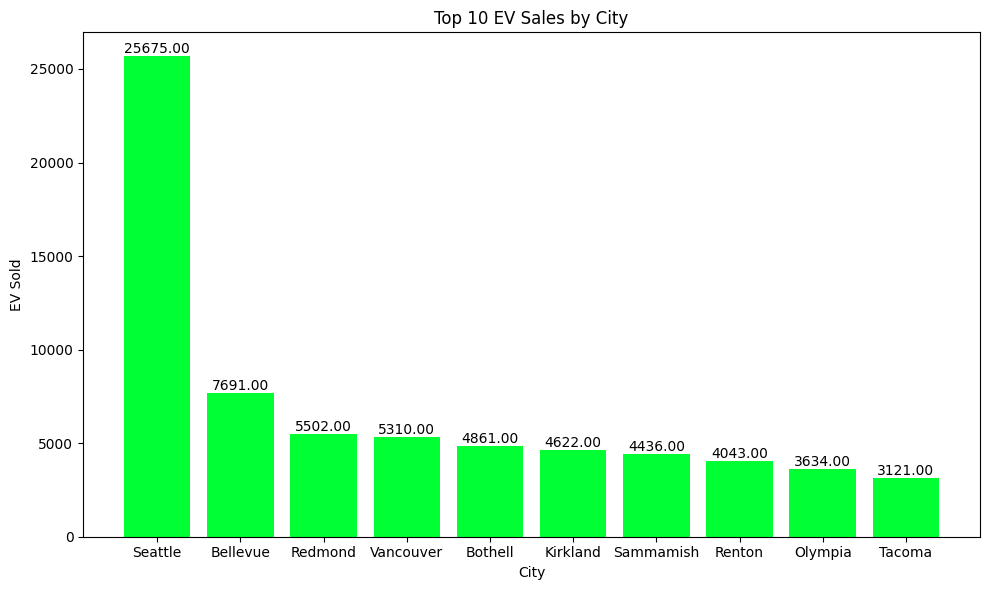

In [28]:
grouped = df.groupby('City')['DOL Vehicle ID'].nunique().reset_index();
top10=grouped.sort_values(by='DOL Vehicle ID', ascending = False).head(10) 
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['City'], top10['DOL Vehicle ID'], color='#00FF33')
plt.title('Top 10 EV Sales by City')
plt.xlabel('City')
plt.ylabel('EV Sold')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

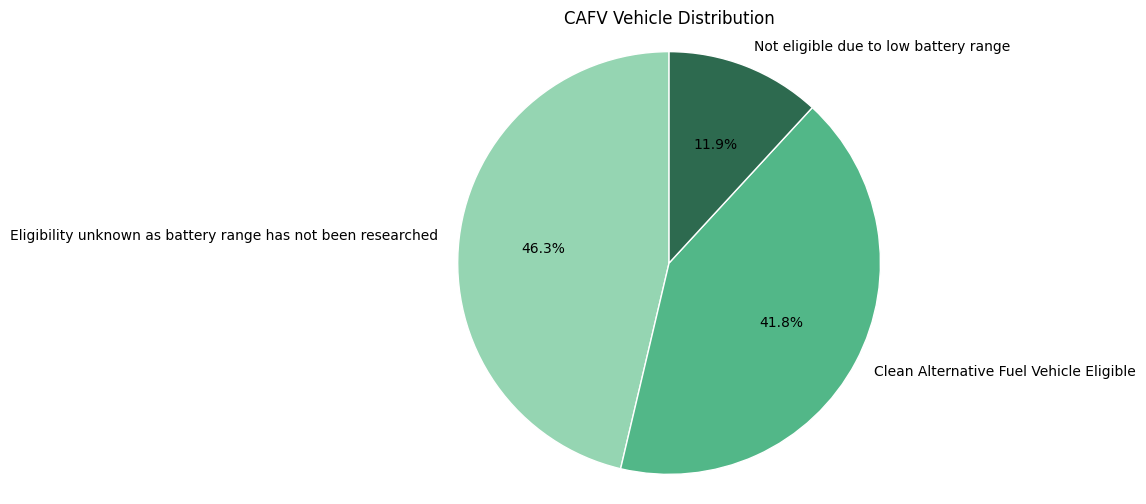

In [29]:
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
labels = cafv_counts.index
sizes = cafv_counts.values
colors = ['#95d5b2', '#52b788', '#2d6a4f']  

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('CAFV Vehicle Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
#plt.tight_layout()
plt.show()


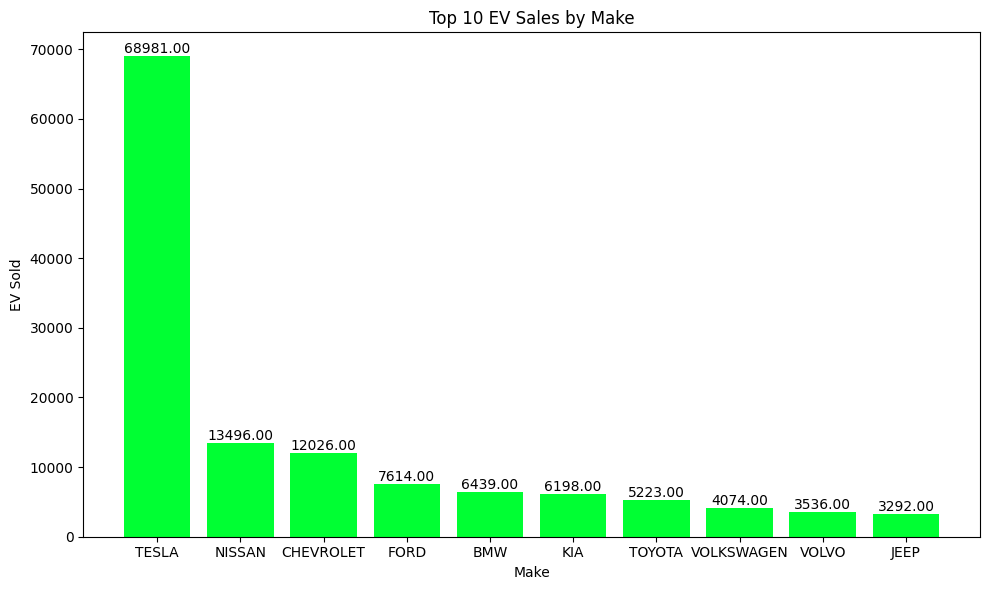

In [36]:
grouped = df.groupby('Make')['DOL Vehicle ID'].nunique().reset_index();
top10=grouped.sort_values(by='DOL Vehicle ID', ascending = False).head(10) #Sort and top 10 values
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['Make'], top10['DOL Vehicle ID'], color='#00FF33')
plt.title('Top 10 EV Sales by Make')
plt.xlabel('Make')
plt.ylabel('EV Sold')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

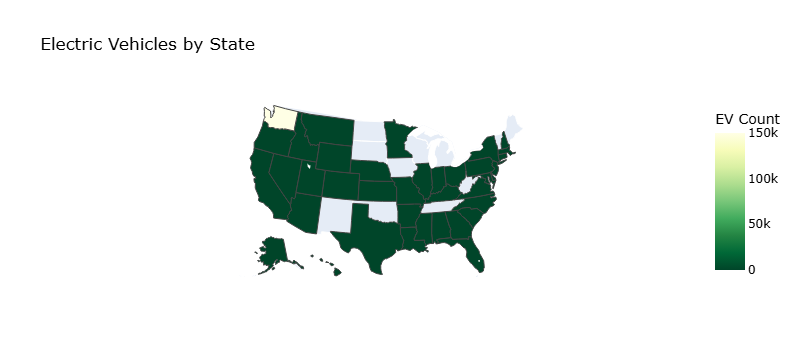

In [39]:

state_data = df.groupby('State')['DOL Vehicle ID'].nunique().reset_index()
state_data.columns = ['State', 'EV_Count']

# Create the choropleth map
fig = px.choropleth(
    state_data,
    locations='State',
    locationmode='USA-states',
    color='EV_Count',
    color_continuous_scale='YlGn_r',  
    scope='usa',
    labels={'EV_Count': 'EV Count'},
    title='Electric Vehicles by State',
    hover_name='State',
)

# Set white background and black font
fig.update_layout(
    geo=dict(bgcolor='white'),      
    paper_bgcolor='white',          
    font_color='black',           
)

fig.show()


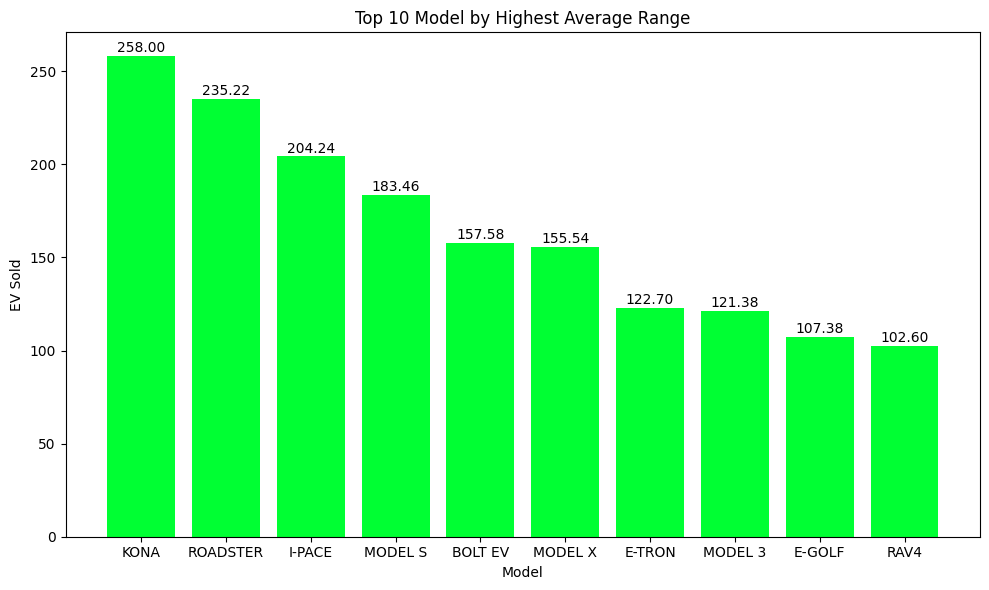

In [38]:
grouped = df.groupby('Model')['Electric Range'].mean().reset_index();
top10=grouped.sort_values(by='Electric Range', ascending = False).head(10) #Sort and top 10 values
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['Model'], top10['Electric Range'], color='#00FF33')

plt.title('Top 10 Model by Highest Average Range')
plt.xlabel('Model')
plt.ylabel('EV Sold')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

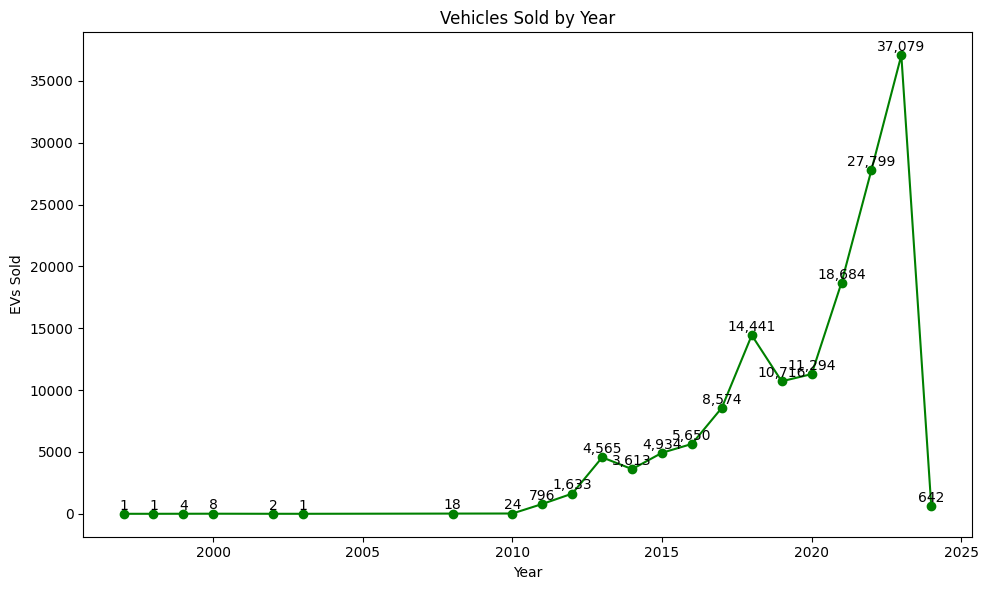

In [45]:
vehicles_by_year = df.groupby('Model Year')['DOL Vehicle ID'].nunique().reset_index()
vehicles_by_year.columns = ['Year', 'Vehicles Sold']
plt.figure(figsize=(10, 6))
for x, y in zip(vehicles_by_year['Year'], vehicles_by_year['Vehicles Sold']):
    plt.text(x, y + 100, f'{y:,}', ha='center', va='bottom')  
plt.plot(vehicles_by_year['Year'], vehicles_by_year['Vehicles Sold'], marker='o', color='green')
plt.title('Vehicles Sold by Year')
plt.xlabel('Year')
plt.ylabel('EVs Sold')
plt.tight_layout()
plt.show()


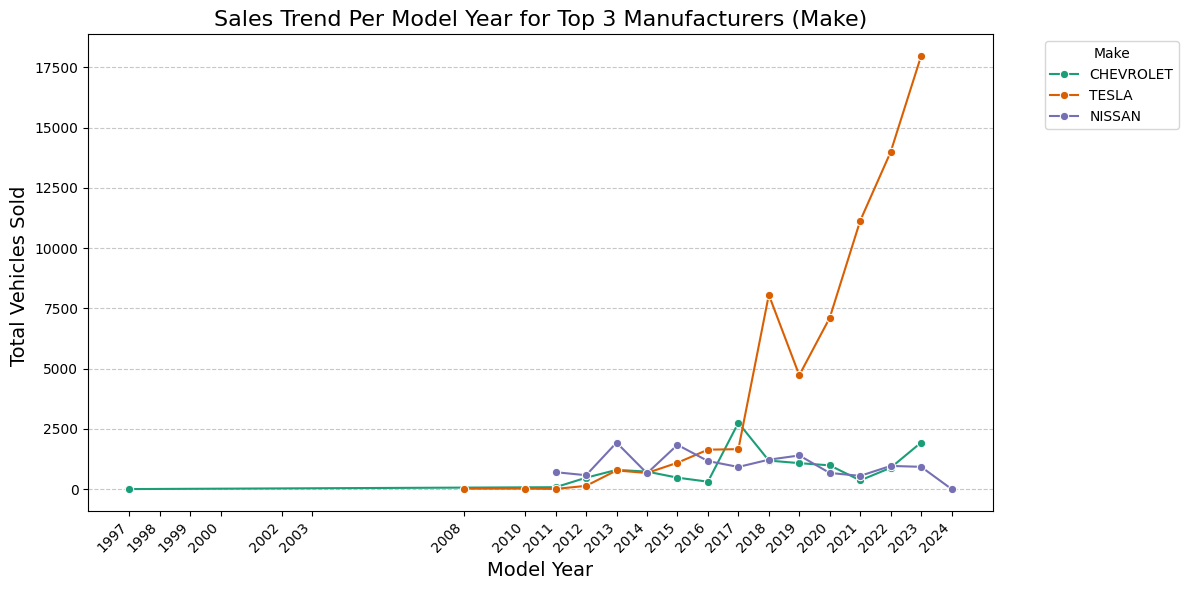

In [57]:
plt.figure(figsize=(12, 6))

year_order = sorted(df['Model Year'].unique())
make_counts = df['Make'].value_counts()
top_3_makes = make_counts.nlargest(3).index.tolist()   
df_filtered = df[df['Make'].isin(top_3_makes)]
sales_over_time = df_filtered.groupby(['Model Year', 'Make']).size().reset_index(name='Total Sales')
sns.lineplot(
data=sales_over_time, 
x='Model Year', 
y='Total Sales',
hue='Make',
palette='Dark2', 
marker='o',
    )
plt.title('Sales Trend Per Model Year for Top 3 Manufacturers (Make)', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Total Vehicles Sold ', fontsize=14)

plt.xticks(year_order, rotation=45, ha='right') 
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
